In [1]:
# brute force attack

# from itertools import product

# alphabets_char_numbers = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 
# 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z','0','1','2','3', '4','5','6','7','8','9',
# '!','@','#','$','%','^','&','*','(',')','-','_','=','+',',',';',':','/','.','<','>'
# ]
#  # chars to look for

# message='$%rema'
# found=0

# for length in range(1, 10): # only do lengths of 1 + 2
#     to_attempt = product(alphabets_char_numbers, repeat=length)
#     for attempt in to_attempt:
#         if message==''.join(attempt):
#             found=1
#             print(''.join(attempt))
#             break

#     if found ==1:
#         break

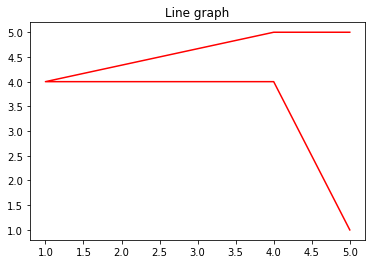

In [20]:
# import numpy as np
# import matplotlib.pyplot as plt

# x = np.array([5, 4, 1, 4, 5])
# y = np.sort(x)

# plt.title("Line graph")
# plt.plot(x, y, color="red")

# plt.show()

In [18]:
import RSA
import timeit
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def checkPrime(num):
    if num > 1:
        for i in range(2, num//2):
            if (num % i) == 0:
                return 0 #not prime
                break
            else:
                return 1 #prime
    else:
        return 0 #not prime

In [4]:
# def getFactors(number, rangeF,rangeL):
#     factors=[]
#     for whole_number in range(rangeF, rangeL):
#         if number % whole_number == 0:
#             if(checkPrime(whole_number) ):
#                 factors.append(whole_number)
#     return factors

In [3]:
def MAth_Attack(c, n, e):
    # listOfFactors=getFactors(n,1,1000000) #search for the small prime facor
    # listOfFactors=getFactors(n,1, n) #search for the large prime facor
    #76327548707654631819288365217926676480014891572829522940868712753524331330993
    for p in range(1, n):
        if n % p == 0:
            if(checkPrime(p)):
                q=n//p
                m = RSA.RSA_Decrypt(c, p, q, e)
                c1= RSA.RSA_Encrypt(m,p, q,e)
                if c1 == c :
                    return m
    return "can't know the message"

In [27]:
# p = 101 # for small prime
# q=18298970732541109011012304219376080251334480295537316123696052970419466495220522723330315111017831737980079504337868198011077274303193766040393009648852841770668239779097280026631944319501437547002412556176186750790476901358334138818777298389724049250700606462316428106882097210008142941838672676714188593227684360287806974345181893018133710957167334490627178666071809992955566020058374505477745993383434501768887090900283569055646901291270870833498474402084748161755197005050874785474707550376333429671113753137201128897550014524209754619355308207537703754006699795711188492048286436285518105948050401762394690148387
# n= p*q

#arr=[76327548707654631819288365217926676480014891572829522940868712753524331330993,69456893419622706704072762858457751909086271322732082866554766081324404294541]
arr=[0, 0]
arr[0],arr[1]=RSA.generate_two_large_primes(16)
# print(arr[1])
n=arr[0]*arr[1]
p=arr[0]
q=arr[1]
exponent = 23917
ciphertext = RSA.RSA_Encrypt("abc2", p,q, exponent)
#m:6 letters, n:64 bit

# attacker only know n and e
start = timeit.default_timer() 
mesg_guessed_byAttacker=MAth_Attack(ciphertext, n, exponent)
end= timeit.default_timer()  - start
print('time: ',end)
print('message: ',mesg_guessed_byAttacker)

# x = np.array([5, 4, 1, 4, 5])
# y = np.sort(x)

# plt.title("Line graph")
# plt.plot(x, y, color="red")

# plt.show()


time:  0.03813900000022841
message:  abc2
